# **附录2：关于神经网络（Neural Network, NN）**

**参考教程：**

+ [Using neural nets to recognize handwritten digits](http://neuralnetworksanddeeplearning.com/chap1.html)


+ 参考这篇[教程](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/)

"In other words, the neural network uses the examples to automatically infer rules for recognizing handwritten digits."

"A way you can think about the perceptron is that it's a device that makes decisions by weighing up evidence. "

" But what the example illustrates is how a perceptron can weigh up different kinds of evidence in order to make decisions. And it should seem plausible that a complex network of perceptrons could make quite subtle decisions: "

“It turns out that we can devise learning algorithms which can automatically tune the weights and biases of a network of artificial neurons. This tuning happens in response to external stimuli, without direct intervention by a programmer. These learning algorithms enable us to use artificial neurons in a way which is radically different to conventional logic gates. Instead of explicitly laying out a circuit of NAND and other gates, our neural networks can simply learn to solve problems, sometimes problems where it would be extremely difficult to directly design a conventional circuit.”

**或许可以从决策的角度去解释，权衡证据判断是 beat 或 非 beat；数字识别例子中，就是判断到底是哪个数字；而这个决策者做决策的依据或者说模型，是它自己从训练数据中摸索出来的，不需要人为具体地去教它；至于它要如何摸索，这个策略或者说算法是人为给出的，但是具体的学习过程是它自己的**

关键就是策略和算法了：

喂给它输入看它的输出，一开始参数是随机值，比较输出与标准输出的差值，通过改变参数（weight，bias）一点点，然后看输出的结果会有什么变化，使它尽可能缩小与标准输出的差异，它就逐渐内化/习得了决策模型。

真实的神经元是 all or nothing 1/0 绝对的判断标准，但这种模式不利于学习，因为参数的一点点变化都有可能让结果的输出值在 0 或 1 之间直接反转，所以采用了 sigmoid node，输出值可能取[0,1]之间的任何真值

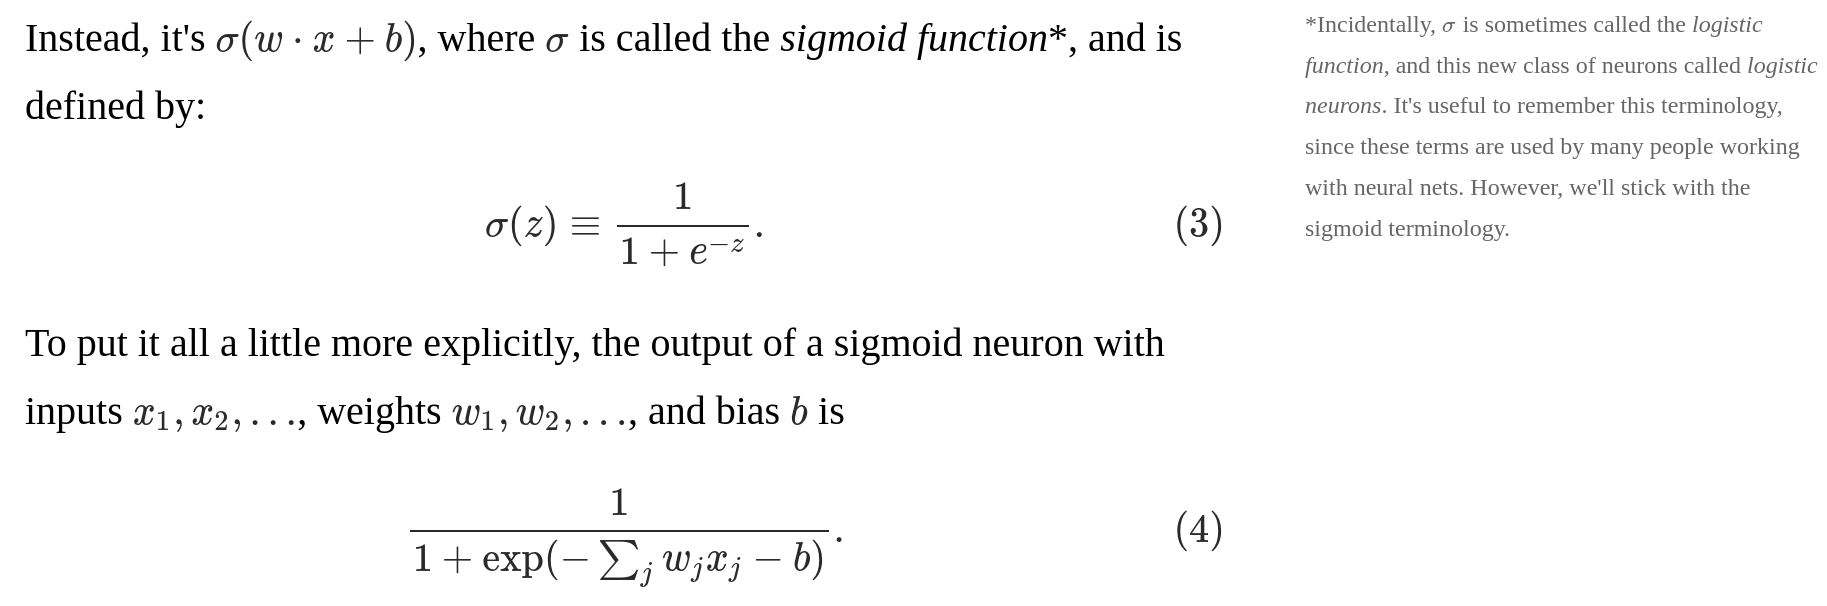

it's a **smoothed out** version of a step function

 Such networks are called feedforward neural networks. This means there are no loops in the network - information is always fed forward, never fed back. If we did have loops, we'd end up with situations where the input to the σ function depended on the output. 
 
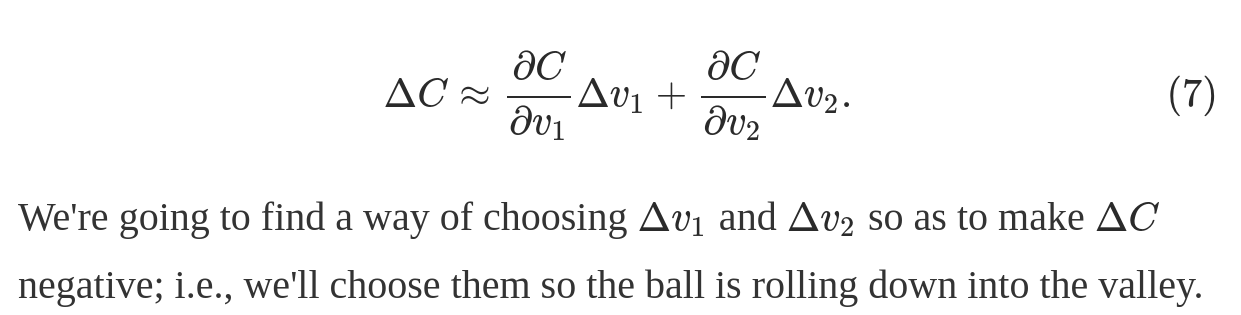
 
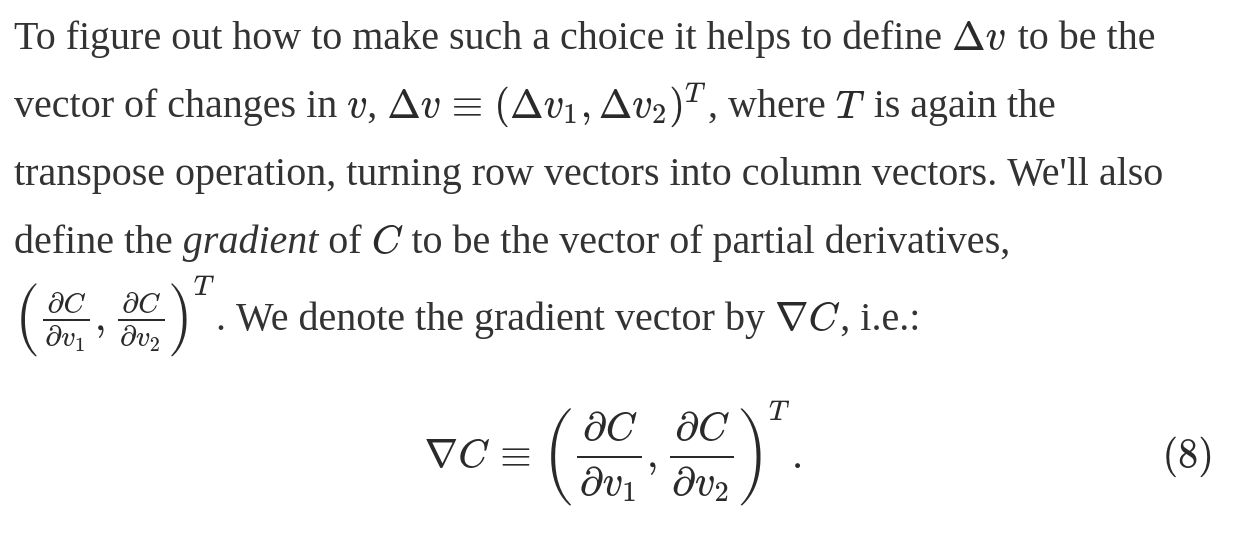

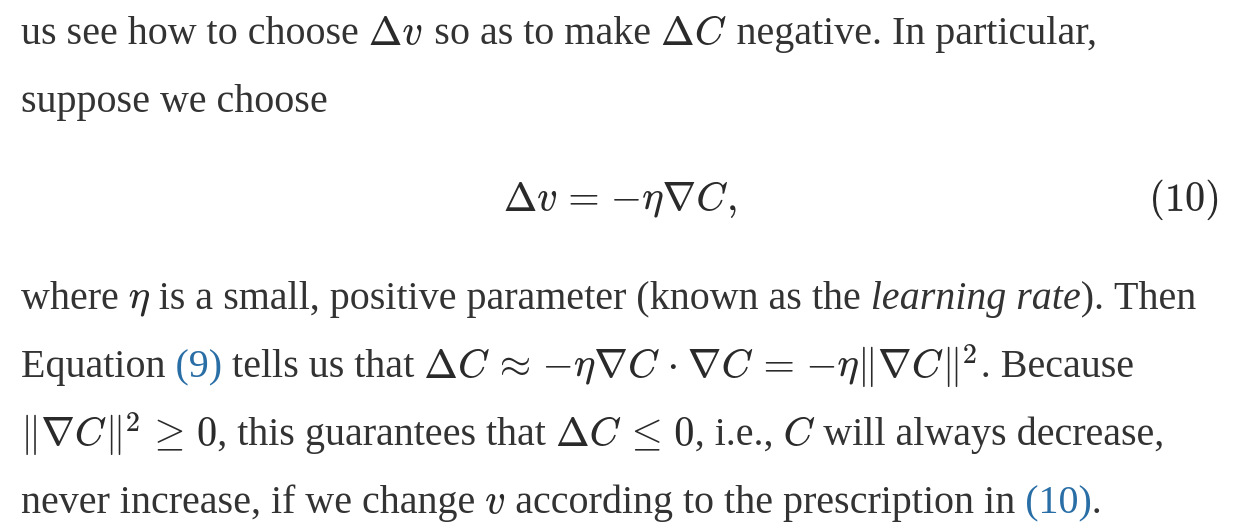

In [6]:
def sigmoid_f(x):
    y = 1 / (1+np.exp(-x))
    return y

In [22]:
x = np.array(10)
y = sigmoid_f(x)

In [23]:
x

array(10)

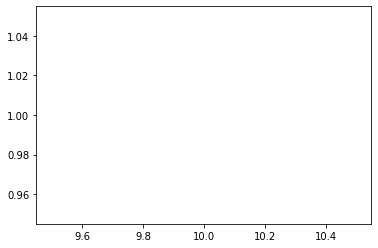

In [24]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [1]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    test_data = list(test_data)
    training_data = list(training_data)
    validation_data = list(validation_data)
    return training_data, validation_data, test_data

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [2]:
training_data, validation_data, test_data = load_data_wrapper()

In [3]:
import numpy as np
import random


class Network(object):
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
      
                        
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    # eta 是 learning rate
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))
    
                        
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
    
                        
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward
        delta = self.cost_derivative(activations[-1], y)*sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta)*sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w
                        
    
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x==y) for (x, y) in test_results)
    
                        
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
                        

        
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
                        
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [6]:
net = Network([784, 30, 10])

In [7]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9082 / 10000
Epoch 1: 9233 / 10000
Epoch 2: 9330 / 10000
Epoch 3: 9277 / 10000
Epoch 4: 9362 / 10000
Epoch 5: 9382 / 10000
Epoch 6: 9364 / 10000
Epoch 7: 9410 / 10000
Epoch 8: 9420 / 10000
Epoch 9: 9391 / 10000
Epoch 10: 9431 / 10000
Epoch 11: 9409 / 10000
Epoch 12: 9424 / 10000
Epoch 13: 9417 / 10000
Epoch 14: 9454 / 10000
Epoch 15: 9433 / 10000
Epoch 16: 9434 / 10000
Epoch 17: 9459 / 10000
Epoch 18: 9441 / 10000
Epoch 19: 9425 / 10000
Epoch 20: 9441 / 10000
Epoch 21: 9419 / 10000
Epoch 22: 9454 / 10000
Epoch 23: 9451 / 10000
Epoch 24: 9455 / 10000
Epoch 25: 9446 / 10000
Epoch 26: 9455 / 10000
Epoch 27: 9442 / 10000
Epoch 28: 9449 / 10000
Epoch 29: 9440 / 10000


#### **首先生成一组数据**

In [34]:
import numpy as np
import sklearn
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

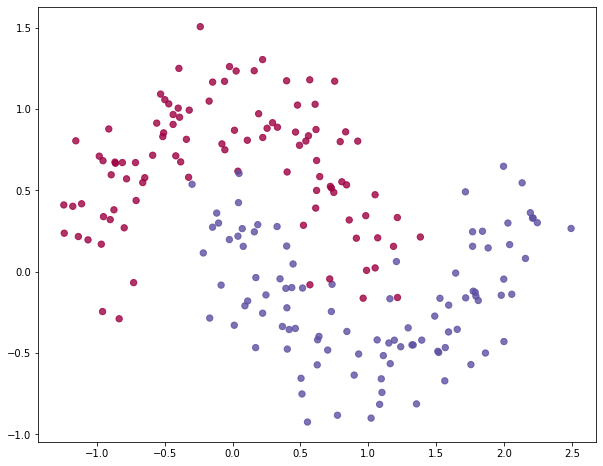

In [35]:
# 使用 scikit-learn 生成一组数据，用 matplotlib 散点图绘出
x, y = sklearn.datasets.make_moons(200, noise=0.2)  # x 对应生成的样本，y 对应每个样本的类别归属（0或1）
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral, alpha=0.8)  #s 表示散点面积大小，c 表示颜色，cmap 表示 colormap

&emsp;

#### **训练一个神经网络分类器，将以上红蓝数据准确分类**

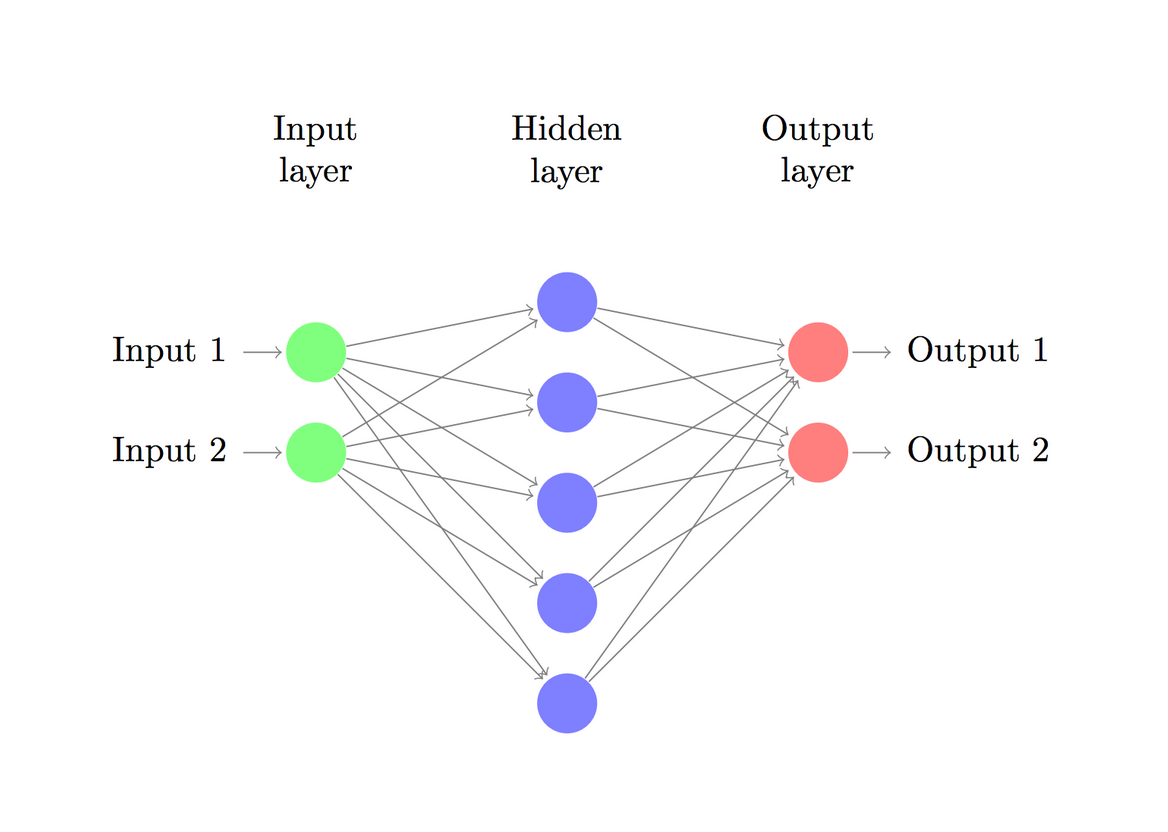

首先，中间隐藏层（hidden layer）的维度（dimensionality）即结点（node）数的确定是一个问题。维度越高，可以拟合的函数就越复杂，但是运算量也会随之增大，而且可能出现过度拟合数据的问题。

此外，还需要为隐藏层选择一个激活函数（activation function），正是这个函数将输入数据转化（transform）为输出数据，教程中选用的是 tanh 激活函数；因为希望以概率形式作为输出结果，输出层的激活函数选用 softmax。

如何确定激活函数的参数？需要用到损失函数（loss function），这个函数是用来评估分类预测的偏差，通过它找到使偏差值最小的激活函数的参数值。通常搭配 softmax 激活函数使用的损失函数是交叉熵（cross-entropy loss），具体地，使用梯度下降（gradient descent）算法来找到使损失函数最小的参数值，在此过程中会用到误差反向传播算法（backpropagation algorithm)。

In [12]:
# 训练数据与神经网络模型的一些参数
num_examples = len(x)      # 训练数据的样本数
nn_input_dim = 2           # 输入层的维度
nn_output_dim = 2          # 输出层的维度

# 梯度下降算法的参数
epsilon = 0.01             # learning rate
reg_lambda = 0.01          # 正则化的强度（regularization strength）

In [13]:
# 定义损失函数

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 正向传播（forward propagation）计算预测值
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    # 计算损失
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # 加入正则项
    data_loss += reg_lambda/2*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_example * data_loss

In [14]:
# 定义神经网络输出结果函数，返回概率最大的

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [27]:
# 确定模型参数，返回神经网络模型
# nn_hdim: 隐藏层的结点数
# num_passes：num of passes through the training data for gradient descent
# print_loss: 如果为真，每迭代 1000 次打印一次损失结果

def build_model(nn_hdim, num_passes=20000):
    
    # 初始化参数为随机值
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # 最终返回的是模型
    model = {}
    
    # 梯度下降算法
    for i in range(0, num_passes):
        
        # 正向传播
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # 反向传播
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T)*(1-np.power(a1, 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # 加上正则项
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # 梯度下降参数更新
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # 将新参数赋予模型
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return model

In [36]:
# 绘制决策边界

def plot_decision_boundary(pred_func):
    # 最大、最小坐标值
    x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
    y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
    # 生成网格（grid）点阵，距离 h
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 为整个网格预测函数值
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 绘制边界和训练样本数据
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Spectral)

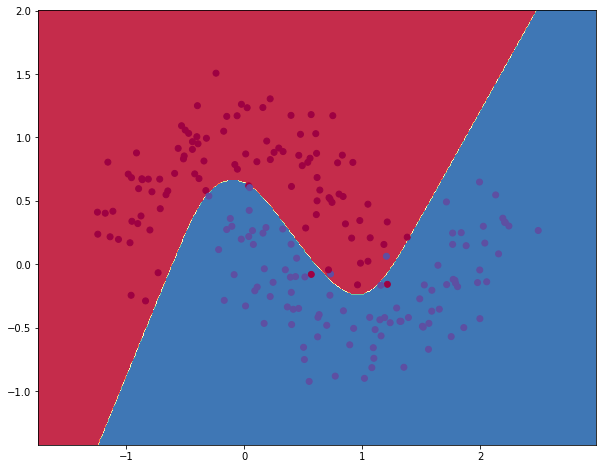

In [37]:
# 创建一个 3维隐藏层的神经网络模型
model = build_model(3)

# 绘制决策边界（decision boundary）
plot_decision_boundary(lambda x: predict(model, x))

&emsp;

### **附：**

**关于正向与反向传播（特别是后者），这篇[博文](http://colah.github.io/posts/2015-08-Backprop/)解释得非常清晰**

参数初始值使用随机值作为起点，均值为0，标准差为1的正态分布